# Machine Learning Practice

## Import data, check data shape and data contents

In [83]:
# pip install --upgrade pandas numpy matplotlib seaborn numexpr missingno

In [84]:
# pip install keras==2.13.1

In [85]:
# pip install --upgrade tensorflow

In [86]:
# pip install numpy==1.20.3

In [87]:
# Import data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [88]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format','{:.2f}'. format)

import warnings
warnings.filterwarnings('ignore')


# `pandas` - show all columns
pd.set_option('display.max_columns', None)

# create data frame importing "Financial Transactions.csv" file into a Pandas DataFrame
#df = pd.read_csv("Financial Transactions.csv")
df = pd.read_csv('Cellphone1.csv')

# To print the dimensions of the DataFrame, we can use the `shape` attribute.
print("\nDataFrame Dimensions:")
print(f"Row count:{df.shape[0]}")
print(f"Attribute count:{df.shape[1]}")
print(" ")

# list the numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Columns:")
display(pd.DataFrame({'column':numerical_columns}))

# list the categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical Columns:")
display(pd.DataFrame({'column':categorical_columns}))

# print a small sample of the DataFrame data
print("\nSample Data:")
display(df.head())


DataFrame Dimensions:
Row count:3333
Attribute count:11
 
Numerical Columns:


,column
0,Churn
1,AccountWeeks
2,ContractRenewal
3,DataPlan
4,DataUsage
5,CustServCalls
6,DayMins
7,DayCalls
8,MonthlyCharge
9,OverageFee



Categorical Columns:


,column



Sample Data:


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10


---------------

# Exploratory Data Analysis

In [89]:
# View the data
df.head().T

,0,1,2,3,4
Churn,0.00,0.00,0.00,0.00,0.00
AccountWeeks,128.00,107.00,137.00,84.00,75.00
ContractRenewal,1.00,1.00,1.00,0.00,0.00
DataPlan,1.00,1.00,0.00,0.00,0.00
DataUsage,2.70,3.70,0.00,0.00,0.00
CustServCalls,1.00,1.00,0.00,2.00,3.00
DayMins,265.10,161.60,243.40,299.40,166.70
DayCalls,110.00,123.00,114.00,71.00,113.00
MonthlyCharge,89.00,82.00,52.00,57.00,41.00
OverageFee,9.87,9.78,6.06,3.10,7.42


### Calculating summary statistics of inputs

In [90]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,0.14,101.06,0.90,0.28,0.82,1.56,179.78,100.44,56.31,10.05,10.24
std,0.35,39.82,0.30,0.45,1.27,1.32,54.47,20.07,16.43,2.54,2.79
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00
25%,0.00,74.00,1.00,0.00,0.00,1.00,143.70,87.00,45.00,8.33,8.50
50%,0.00,101.00,1.00,0.00,0.00,1.00,179.40,101.00,53.50,10.07,10.30
75%,0.00,127.00,1.00,1.00,1.78,2.00,216.40,114.00,66.20,11.77,12.10
max,1.00,243.00,1.00,1.00,5.40,9.00,350.80,165.00,111.30,18.19,20.00


### Checking for null values (#)

In [91]:
# Checking for the sum of null values in the columns
print("Checking for the sum of null values in the columns:\n\n",
df.isnull().sum())

Checking for the sum of null values in the columns:

 Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


### What percentage of the values are missing?
As a general rule of guidance:
> If the missing data is around 5% or less, there might not need to be any data cleaning applied (filling NA's with data)

> However, if missing data is around 20-30%, and the attribute is important - then missing values can be dealt with using the .fillna() method with the mean or median of the attribute

In this case, there are no missing data points.

In [92]:
# Checking for the percentage (%) of null values in the columns (helps determine which to drop or adjust)
print("Checking for the percentage (%) of null values in the columns :\n\n",
df.isnull().mean())

Checking for the percentage (%) of null values in the columns :

 Churn             0.00
AccountWeeks      0.00
ContractRenewal   0.00
DataPlan          0.00
DataUsage         0.00
CustServCalls     0.00
DayMins           0.00
DayCalls          0.00
MonthlyCharge     0.00
OverageFee        0.00
RoamMins          0.00
dtype: float64


In [93]:
numerical_columns

['Churn',
 'AccountWeeks',
 'ContractRenewal',
 'DataPlan',
 'DataUsage',
 'CustServCalls',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [94]:
categorical_columns

[]

-----------------

### Additional Basic Checks

In [95]:
# Data shape
print("\nDataFrame Dimensions (rows and columns)\n")
print(f"Row count: {df.shape[0]}")
print(f"Attribute count: {df.shape[1]}")
print("\n------------------\n")

# Data info
print("Checking data info:\n\n",
df.info(),
"\n\n------------------\n")

# Checking the columns for duplicated values
print("Checking the columns for duplicated values:\n\n",
df.duplicated().sum(),
"\n\n------------------\n")


DataFrame Dimensions (rows and columns)

Row count: 3333
Attribute count: 11

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
Checking data info:

 None 

------------------

Checking the columns for duplicated values:

 0 

------------------



## Visualising missing values in the dataset

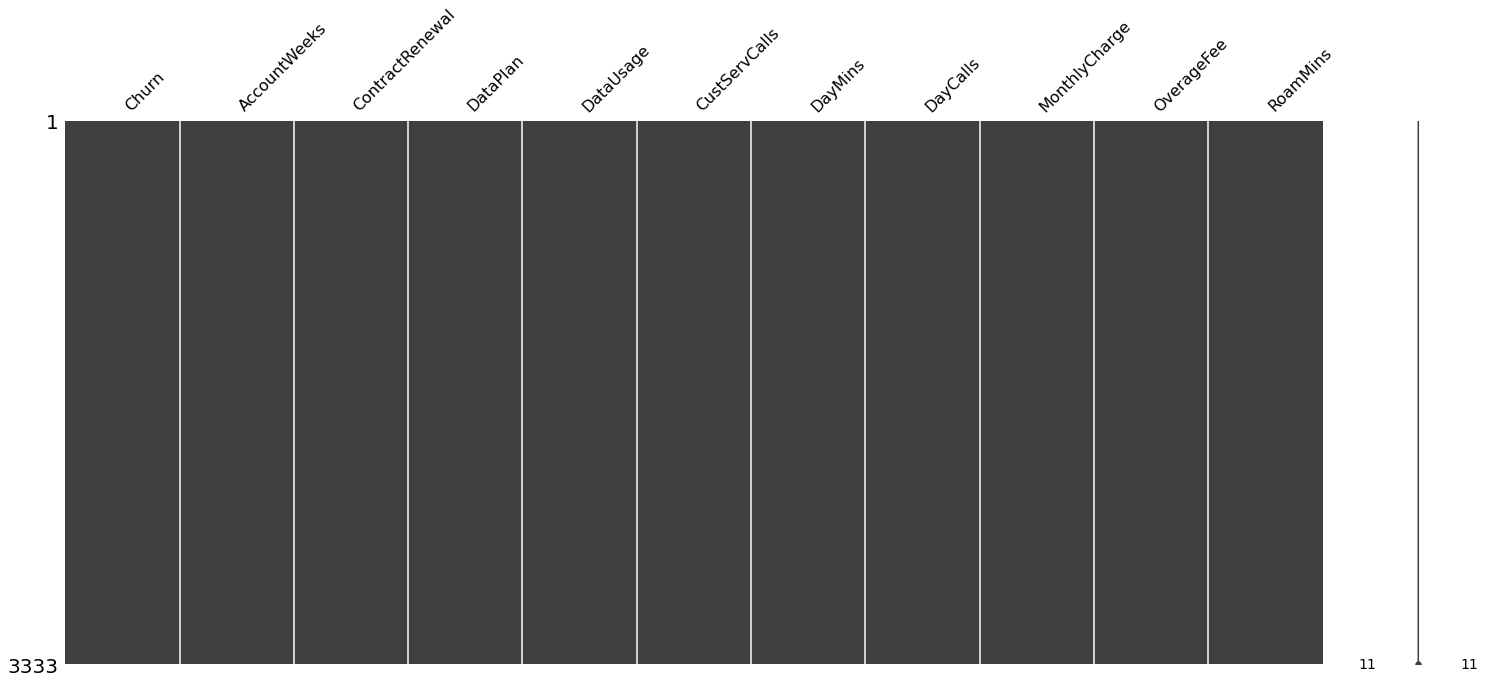

In [96]:
# pip install missingno
import missingno as msno

# Visualise the missingness pattern
msno.matrix(df)
plt.show()

# msno.heatmap(df)
# plt.show()

# msno.dendrogram(df)
# plt.show()

-----------------

# EDA Visualisations

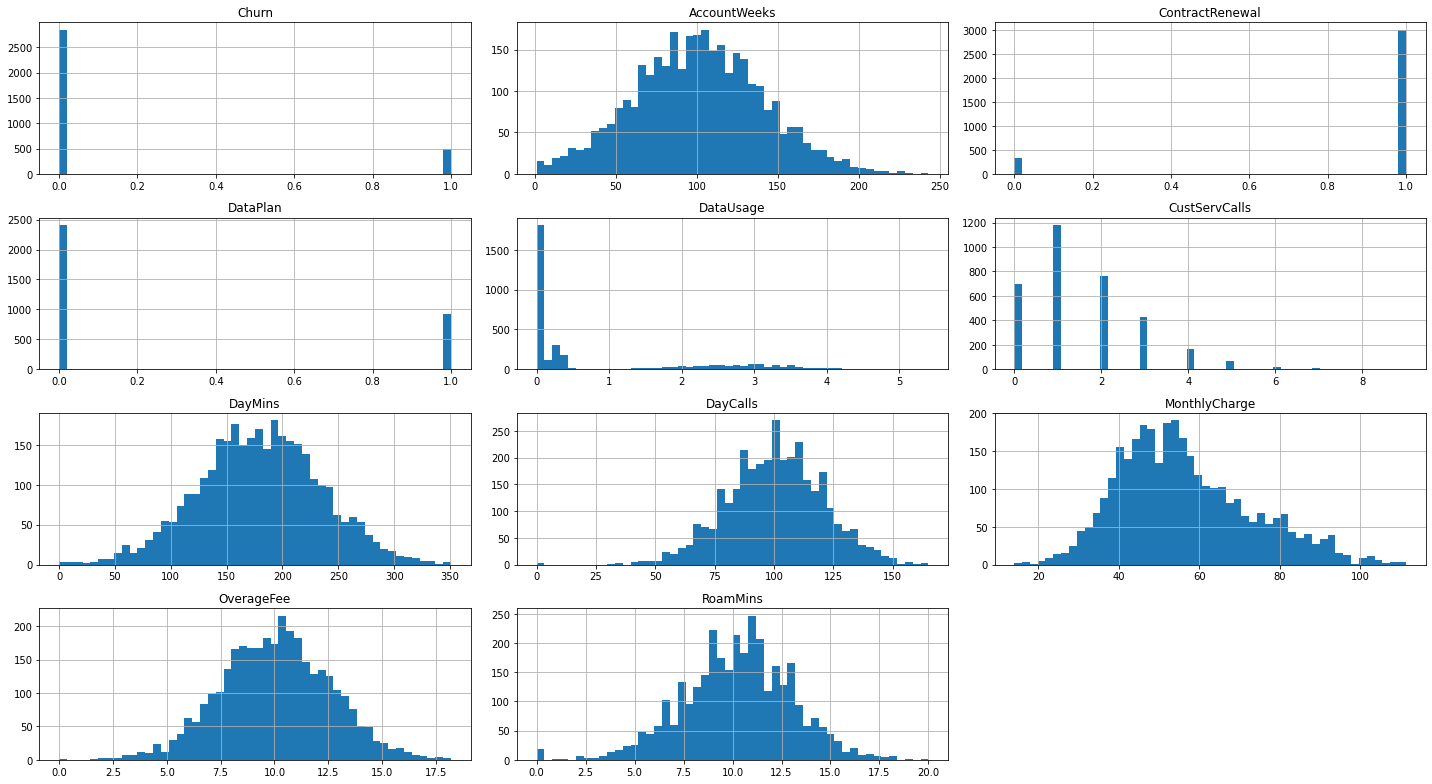

In [97]:
# Visualise each column in a histogram
df.hist(bins=50, figsize=(20,11))
plt.title(40)
plt.tight_layout()
plt.show()

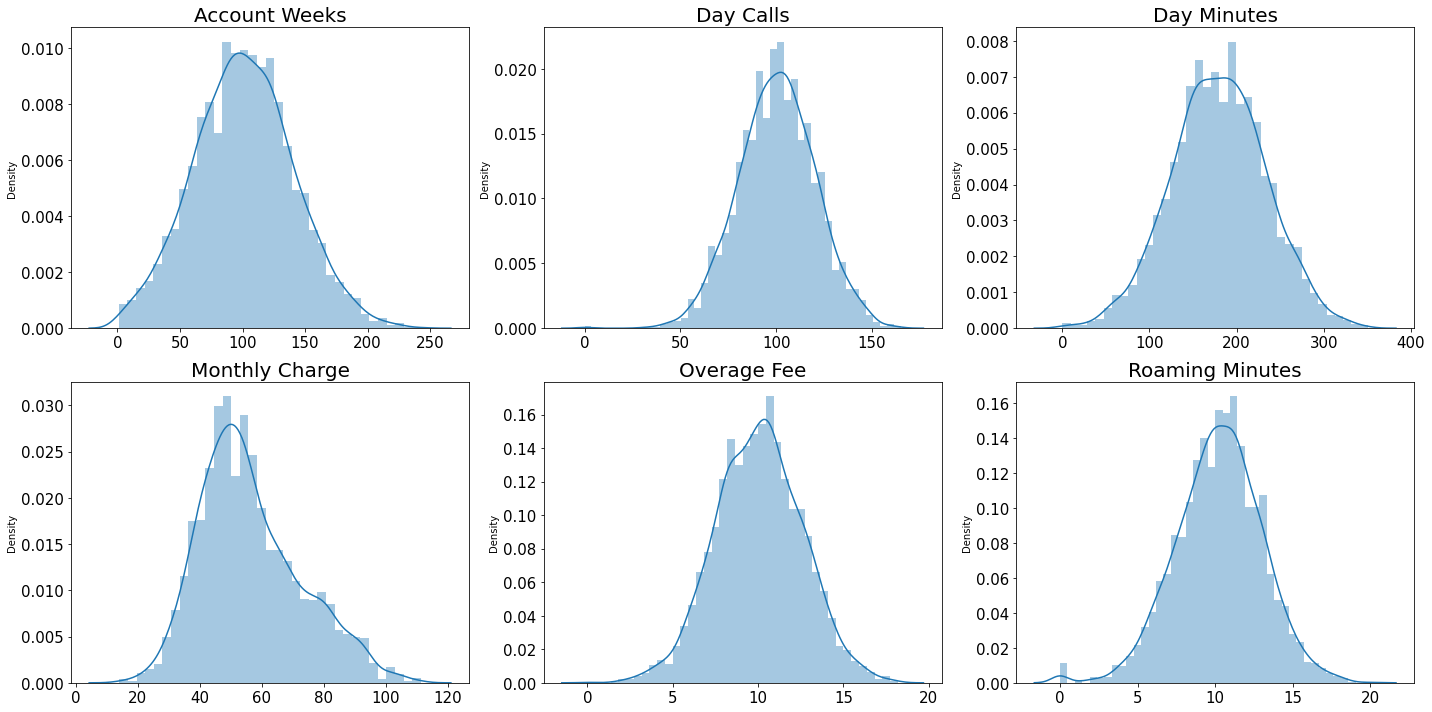

In [98]:
#Now we will see the distribution
# Plotting the subplots to check the outliers analysis
# Plotting the subplots to check the outliers analysis
fig, axes = plt.subplots(2, 3, figsize=(20,10))
columns = ['AccountWeeks', 'DayCalls', 'DayMins', 'MonthlyCharge', 'OverageFee', 'RoamMins']
titles = ['Account Weeks', 'Day Calls', 'Day Minutes', 'Monthly Charge', 'Overage Fee', 'Roaming Minutes']

for ax, col, title in zip(axes.flatten(), columns, titles):
    sns.distplot(df[col], ax=ax)
    ax.set_title(title, fontsize=20)
    ax.set(xlabel=None)
    ax.tick_params(labelsize=15)

plt.tight_layout()
plt.show()

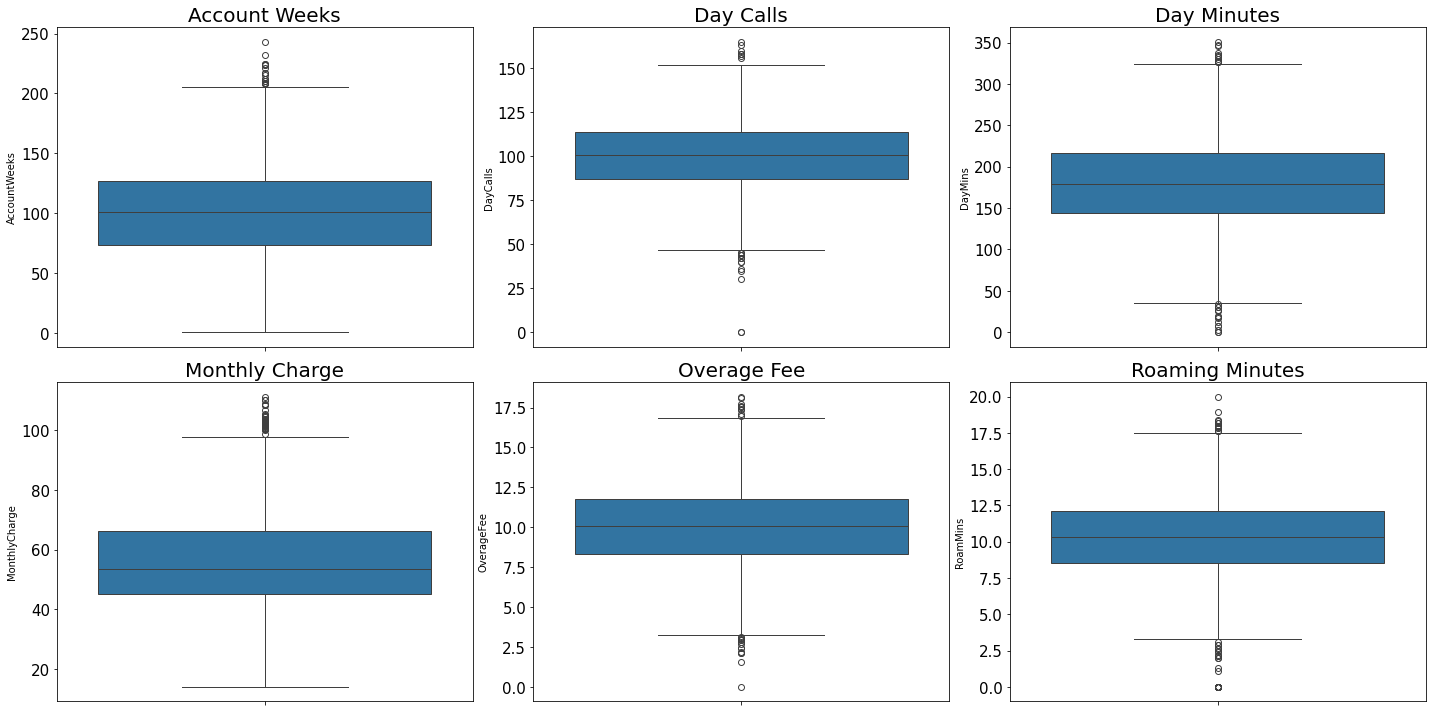

In [99]:
# Plotting the subplots to check the outliers analysis
fig, axes = plt.subplots(2, 3, figsize=(20,10))
columns = ['AccountWeeks', 'DayCalls', 'DayMins', 'MonthlyCharge', 'OverageFee', 'RoamMins']
titles = ['Account Weeks', 'Day Calls', 'Day Minutes', 'Monthly Charge', 'Overage Fee', 'Roaming Minutes']

for ax, col, title in zip(axes.flatten(), columns, titles):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(title, fontsize=20)
    ax.set(xlabel=None)
    ax.tick_params(labelsize=15)

plt.tight_layout()
plt.show()

-----------------

### Multicollinearity 

Multicollinearity is a statistical concept where two or more features (or independent variables) in a dataset are highly correlated. In other words, one variable can be linearly predicted from the others with a substantial degree of accuracy.
In the context of machine learning and data modelling, multicollinearity can be problematic for a couple of reasons:
- It can lead to unstable and unreliable estimates of regression coefficients. Small changes in the data can lead to large changes in the model, making interpretation difficult.
- It can inflate the standard errors of the coefficients. This means that variables can be statistically insignificant when they should be significant.

To detect multicollinearity, we often use the Variance Inflation Factor (VIF). 
- A VIF value of 1 indicates no correlation between a given independent variable and the others. 
- A VIF above 1 but below 5 or 10 (depending on the threshold you choose) suggests moderate correlation, but is often acceptable. A VIF above 5 or 10 indicates high multicollinearity.

Please note that while multicollinearity can affect the coefficients and p-values in a regression model, it does not affect the model's ability to predict the dependent variable.

> This will print out the VIF for each numeric column in your DataFrame. 

> Remember, a VIF value that exceeds 5 or 10 indicates high multicollinearity.

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each numeric column
vif = pd.DataFrame()
vif["Features"] = numerical_columns
vif["VIF"] = [variance_inflation_factor(df[numerical_columns].values, i) for i in range(len(numerical_columns))]

print(vif)

           Features      VIF
0             Churn     1.41
1      AccountWeeks     6.97
2   ContractRenewal     9.97
3          DataPlan    16.40
4         DataUsage  2673.50
5     CustServCalls     2.50
6           DayMins 11949.93
7          DayCalls    19.36
8     MonthlyCharge 40114.71
9        OverageFee  3677.53
10         RoamMins    15.63


To visualize the correlation between features, you can use seaborn's heatmap function:

### Correlation Matrix

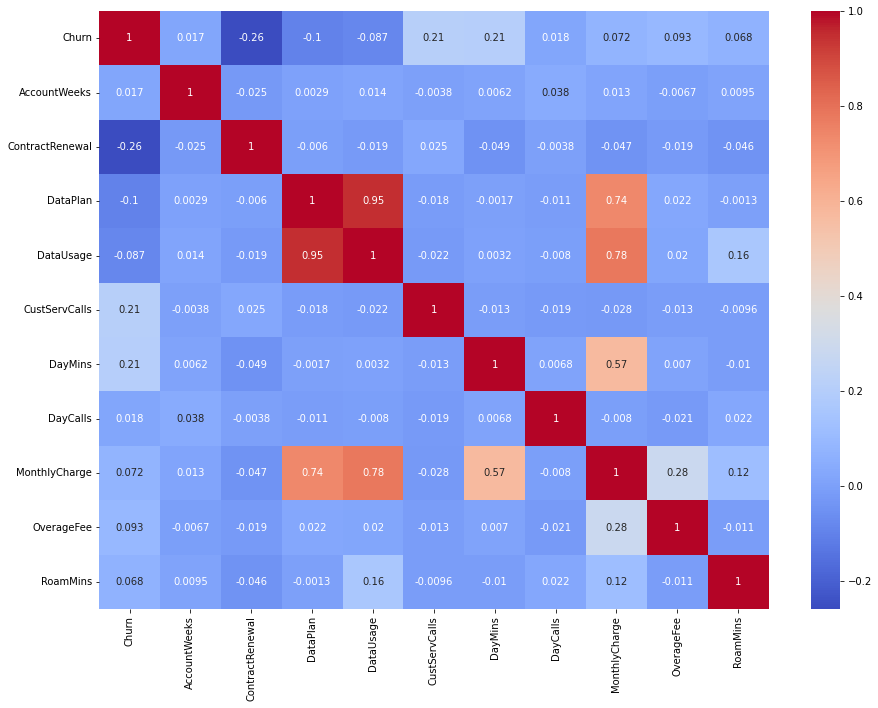

In [112]:
correlation_matrix = df.corr()

plt.figure(figsize=(15,11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Questions to interrogate the data

**What is the distribution of each feature?** 
> Understanding the distribution of each feature can reveal patterns, outliers, or anomalies in the data. It can also help identify whether any transformations (like log transformation for skewed data) might be necessary.

**Are there correlations between features?** 
> Visualising the relationships between different features can help identify whether any features are highly correlated. This is important because highly correlated features can lead to multicollinearity in some models, which can negatively impact the model's performance.

**Are there outliers in the data?** 
> Outliers can significantly influence a model's performance. Visualising the data can help identify outliers so you can decide how to handle them.

**How does each feature relate to the target variable?** 
> Visualising the relationship between each feature and the target variable can provide insights into which features might be important predictors.

**Are there distinct groups or clusters in the data?** 
> Visualising the data can help identify any natural groupings in the data, which might be useful for clustering or classification tasks.

**Is there missing data in the features?** 
> Visualising missing data can help you understand the extent of the missing data problem and strategize how to handle it.

**Are any features skewed?** 
> Skewness refers to the asymmetry in the probability distribution of a real-valued random variable about its mean. In simpler terms, it's a measure of the lack of symmetry in data distribution. If the data is heavily skewed, it may lead to a bias in machine learning models. Some machine learning algorithms assume that the data is normally distributed and can perform poorly if this assumption is violated. Therefore, identifying and handling skewed data is a crucial step in the data pre-processing stage.

**Are some features too granular?** 
> Granularity refers to the level of detail or summarisation in your data. Features that are too granular may introduce unnecessary complexity and noise into your model, potentially leading to overfitting. On the other hand, data that's not granular enough may lack the detail needed to make accurate predictions. Striking the right balance in data granularity is important for creating a model that generalizes well to unseen data.

**What is the dependent variable?** 
> The dependent variable, also known as the target variable, is what you're trying to predict or estimate. Identifying the dependent variable is one of the most important steps in supervised learning. It's the basis for training the model, as the model's goal is to learn the relationship between the independent variables (features) and the dependent variable. Understanding the nature of the dependent variable (whether it's continuous, categorical, binary, etc.) also helps in selecting the appropriate machine learning algorithm.

**How are the features scaled?** 
> Feature scaling refers to the methods used to standardise the range of independent variables or features of data. Some machine learning algorithms perform better when the input numerical variables fall within a similar scale. In some datasets, features could have a variety of ranges. For instance, one feature might range from 0 to 1, while another ranges from 1 to 1000. Algorithms based on distance measures (like k-NN and SVM) can be sensitive to the range of features. Therefore, assessing and applying appropriate feature scaling techniques is an important step in data preprocessing.

**Are there any missing values in the features?** 
> Missing data in the features can lead to misleading results and reduce the statistical power of the model. Depending on the extent and nature of the missing data, different strategies like deletion, imputation, or prediction models can be applied. Understanding the pattern of missingness and dealing with missing data appropriately is crucial to maintain the accuracy and reliability of the machine learning model.

**What is the nature of the relationship between the features and the target variable?** 
> Understanding the relationship between the features and the target variable is key to selecting the right model. Some models assume a linear relationship, while others can handle non-linear relationships. Visualising and quantitatively measuring the relationship (correlation, mutual information, etc.) can provide insights into the most predictive features and guide the selection of the most suitable machine learning algorithm.

**Are the features categorical or numerical?** 
> The type of the features (categorical or numerical) influences the choice of preprocessing steps (like encoding or scaling) and the choice of machine learning algorithm. Some algorithms handle categorical data directly, while others require numerical input. Therefore, identifying the type of each feature and handling them appropriately is an essential step in the data preprocessing stage.

**Is there multicollinearity in the features?** 
> Multicollinearity refers to a situation where two or more features are highly linearly related. Multicollinearity can lead to unstable estimates and make the model's output difficult to interpret. Techniques like Variance Inflation Factor (VIF), correlation matrices, or feature importance from tree-based models can help detect multicollinearity. If present, strategies like feature selection, regularization, or dimensionality reduction techniques can be applied.



-----------------

## Modelling the data

### Libraries

In [102]:
import sklearn.neural_network
# help(sklearn.neural_network)
dir(sklearn.neural_network)

['BernoulliRBM',
 'MLPClassifier',
 'MLPRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_multilayer_perceptron',
 '_rbm',
 '_stochastic_optimizers']

In [103]:
# Import necessary libraries - data split, models
from sklearn.model_selection import train_test_split, cross_val_score
# from keras.models import Sequential

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [104]:
# Import scaling and feature engineering packages (data engineering)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# from category_encoders import OneHotEncoder

In [105]:
# Import necessary libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

### Data spliting

In [106]:
# Define features and target variable
df_feature = df.drop(['Churn'], axis=1)
df_label = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_label, test_size=0.2, random_state=42)

> When building a machine learning model, we're trying to create a function that can map the input features (independent variables) to the output (dependent or target variable).

The reason we drop the target variable from the features is because we want our model to learn this mapping from the data. If we include the target variable in the features, the model will simply learn to predict the target variable from itself, which is not what we want.

In [107]:
df_feature.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10


In [108]:
df_feature.info()
df_feature.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   int64  
 1   ContractRenewal  3333 non-null   int64  
 2   DataPlan         3333 non-null   int64  
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 260.5 KB


,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,0.90,0.28,0.82,1.56,179.78,100.44,56.31,10.05,10.24
std,39.82,0.30,0.45,1.27,1.32,54.47,20.07,16.43,2.54,2.79
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00
25%,74.00,1.00,0.00,0.00,1.00,143.70,87.00,45.00,8.33,8.50
50%,101.00,1.00,0.00,0.00,1.00,179.40,101.00,53.50,10.07,10.30
75%,127.00,1.00,1.00,1.78,2.00,216.40,114.00,66.20,11.77,12.10
max,243.00,1.00,1.00,5.40,9.00,350.80,165.00,111.30,18.19,20.00


In [109]:
df_label.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

### Data Engineering

In [110]:
# Standardize the features
scaler = StandardScaler()

# Feature scaling - overwriting variables
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Feature Scaling - new variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert numpy array back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now you can use .head()
X_train_scaled_df.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,3.60,0.33,-0.61,-0.64,0.32,-1.55,-0.43,-1.54,-0.73,-1.30
1,0.18,0.33,-0.61,-0.64,1.81,-1.24,0.22,-1.23,-0.14,-2.19
2,-0.65,-3.06,-0.61,-0.64,-0.43,0.79,-1.13,0.61,2.49,-0.55
3,1.02,0.33,-0.61,-0.64,-0.43,-0.97,-0.13,-1.17,-0.41,-0.80
4,-0.37,0.33,-0.61,-0.36,-1.18,0.68,-0.23,0.46,1.30,-2.05


**You cannot print the numpy array with the .head() function**

> The head() function is a method available in pandas DataFrame objects, but not in numpy arrays.

> When you use StandardScaler's fit_transform() or transform() method, it returns a numpy array, not a DataFrame. That's why you're getting an AttributeError when you try to use head() on X_train_scaled or X_test_scaled.

> This code converts the numpy arrays X_train_scaled and X_test_scaled back into DataFrames, using the column names from the original DataFrames X_train and X_test. Now you can use the head() method to view the first few rows of the scaled data.

### Training the models

In [113]:
# Initialize a dictionary to store the models and their accuracies
model_accuracies = {}

# Collect metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

#---------------------

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions)}')

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, gb_predictions)}')

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions)}')

# Support Vector Machines with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear_predictions = svm_linear.predict(X_test)
print(f'SVM Linear Accuracy: {accuracy_score(y_test, svm_linear_predictions)}')

# Support Vector Machines with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf_predictions = svm_rbf.predict(X_test)
print(f'SVM RBF Accuracy: {accuracy_score(y_test, svm_rbf_predictions)}')

# k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(f'kNN Accuracy: {accuracy_score(y_test, knn_predictions)}')

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_predictions)}')

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}')

# Neural Network
# nn = Sequential()
# nn.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
# nn.add(Dense(1, activation='sigmoid'))
# nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# nn.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
# nn_predictions = (nn.predict(X_test) > 0.5).astype('int32')
# print(f'Neural Network Accuracy: {accuracy_score(y_test, nn_predictions)}')

# Neural network - Multilayer perceptitron 
nn = MLPClassifier(max_iter=1000)
nn.fit(X_train, y_train)
nn_predictions = nn.predict(X_test)
print(f'NN Multilayer Perceptron: {accuracy_score(y_test, nn_predictions)}')

# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_predictions = ada.predict(X_test)
print(f'AdaBoost Accuracy: {accuracy_score(y_test, ada_predictions)}')

Logistic Regression Accuracy: 0.8470764617691154
Gradient Boosting Accuracy: 0.9370314842578711
XGBoost Accuracy: 0.9235382308845578
SVM Linear Accuracy: 0.848575712143928
SVM RBF Accuracy: 0.8500749625187406
kNN Accuracy: 0.8740629685157422
Decision Tree Accuracy: 0.8740629685157422
Random Forest Accuracy: 0.9220389805097451
NN Multilayer Perceptron: 0.8680659670164917
AdaBoost Accuracy: 0.896551724137931


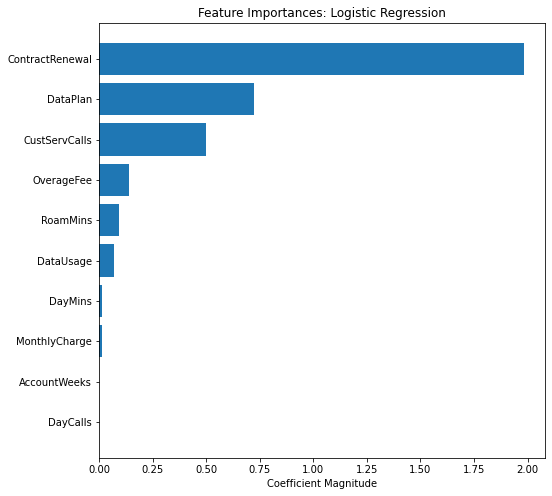

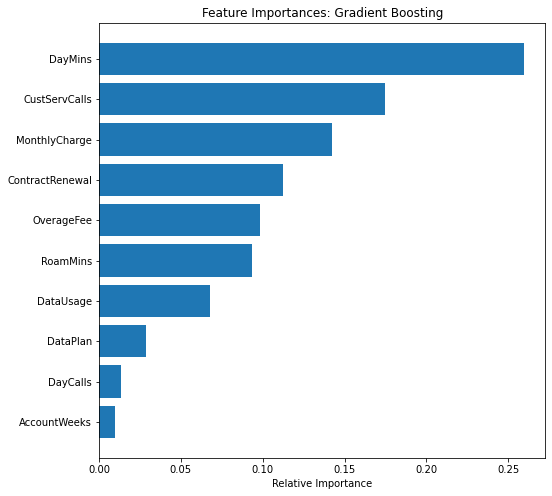

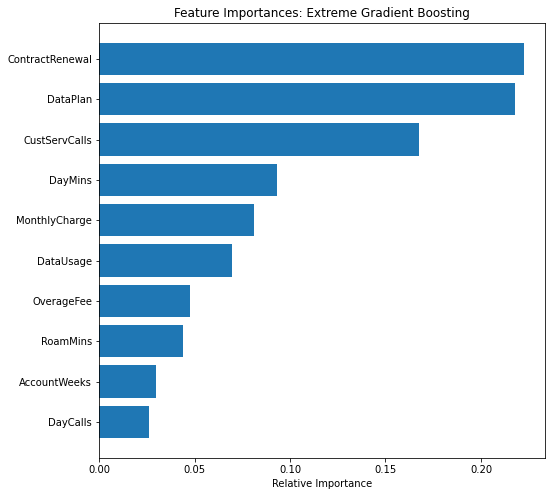

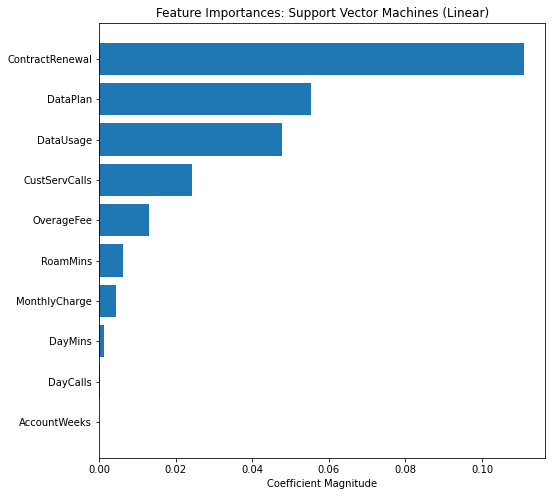

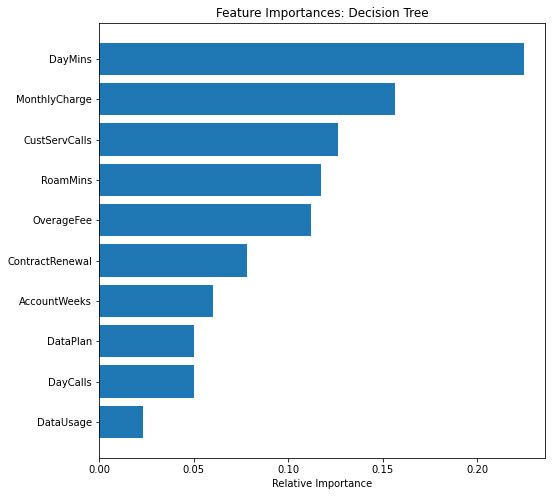

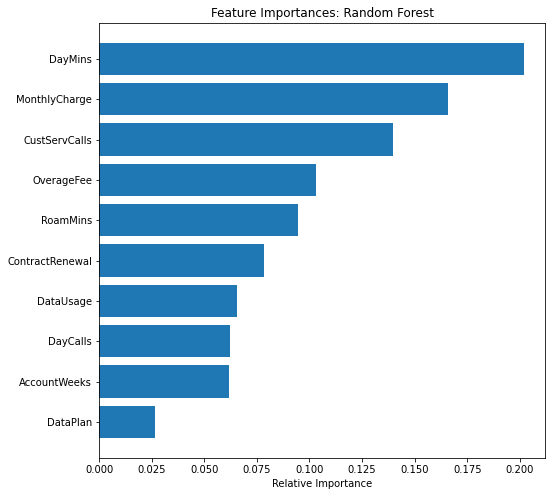

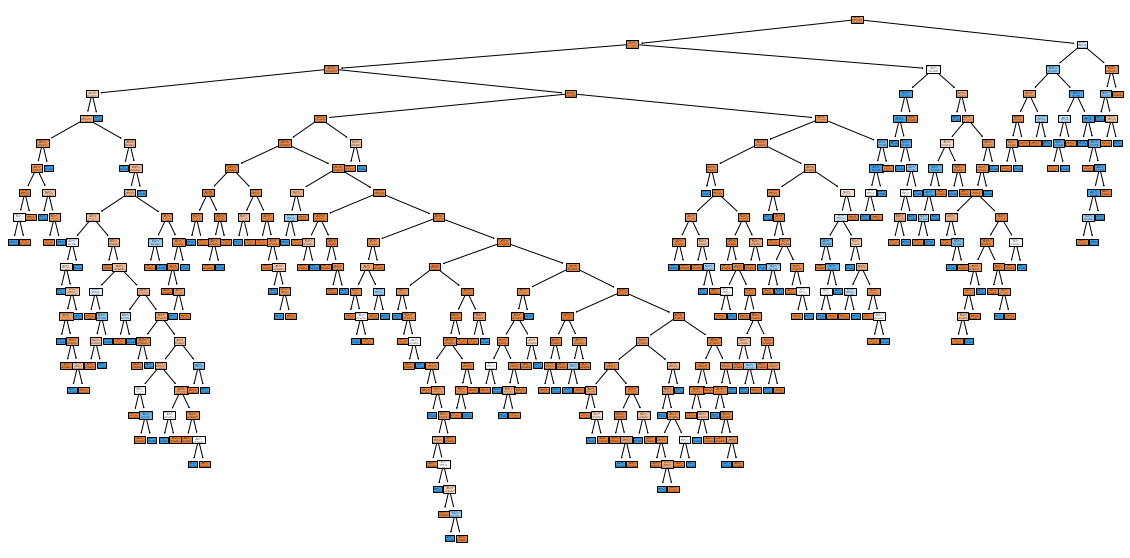

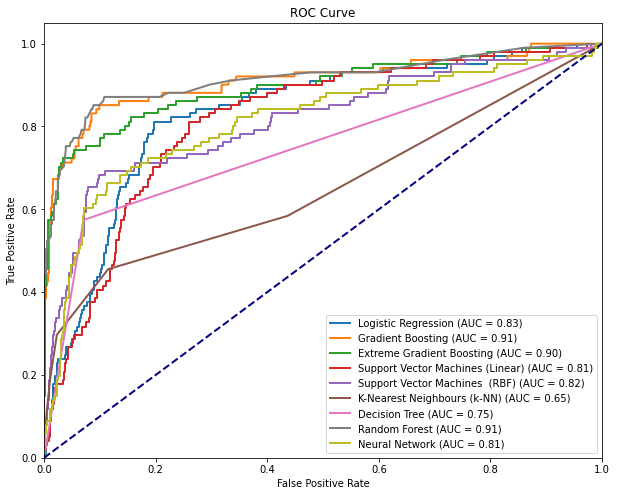

,Model,Accuracy,Precision_Score,Recall_Score,F1_Score,ROC_AUC
0,Logistic Regression,0.86,0.64,0.18,0.28,0.83
1,Gradient Boosting,0.94,0.88,0.67,0.76,0.91
2,Extreme Gradient Boosting,0.92,0.84,0.61,0.71,0.90
3,Support Vector Machines (Linear),0.85,0.00,0.00,0.00,0.81
4,Support Vector Machines (RBF),0.85,1.00,0.01,0.02,0.82
5,K-Nearest Neighbours (k-NN),0.87,0.70,0.30,0.42,0.65
6,Decision Tree,0.88,0.59,0.57,0.58,0.75
7,Random Forest,0.93,0.86,0.61,0.72,0.91
8,Neural Network,0.87,0.59,0.51,0.55,0.81


In [114]:
# Define classifiers
classifiers = [
    LogisticRegression(max_iter=1000),
    GradientBoostingClassifier(),
    XGBClassifier(),
    SVC(kernel='linear', probability=True),
    SVC(kernel='rbf', probability=True),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(max_iter=1000)
]

# Classifier names
classifier_names = [
    "Logistic Regression", "Gradient Boosting", "Extreme Gradient Boosting", "Support Vector Machines (Linear)", "Support Vector Machines  (RBF)",
    "K-Nearest Neighbours (k-NN)", "Decision Tree", "Random Forest", "Neural Network"
]

# Initialize storage for metrics
results = []

# Storage for ROC curve data
roc_data = []

# Fit, evaluate, and visualize classifiers 
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Collect metrics
    accuracy =  metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    # Calculate ROC/AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision_Score": round(precision, 4),
        "Recall_Score": round(recall, 4),
        "F1_Score": round(f1, 4),
        "ROC_AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    })

    if y_prob is not None:
        roc_data.append((fpr, tpr, roc_auc, name))

    # Display feature importance if available
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        indices = np.argsort(importances)

        plt.figure(figsize=(8,8))
        plt.title(f'Feature Importances: {name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [df_feature.columns[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()
    elif hasattr(clf, 'coef_'):
        importances = np.abs(clf.coef_[0])
        indices = np.argsort(importances)

        plt.figure(figsize=(8,8))    
        plt.title(f'Feature Importances: {name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [df_feature.columns[i] for i in indices])
        plt.xlabel('Coefficient Magnitude')
        plt.show()

# Visualise the decision tree
plt.figure(figsize=(20,10))
plt.title('Decision Tree Visualisation')
plot_tree(classifiers[6], filled=True, feature_names=X_train.columns, class_names=["Didn't Churn", 'Churned'])
plt.show()

# Plot all ROC curves on the same graph
plt.figure(figsize=(10, 8))
for fpr, tpr, roc_auc, name in roc_data:
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Create DataFrame
comparison_table = pd.DataFrame(results)
comparison_table

**Business Explanation**

**Accuracy:** This is the ratio of correct predictions (both true positives and true negatives) to the total number of predictions. All models have an accuracy of above 90%, which is quite good.

**Precision Score:** This is the ratio of true positives (customers correctly identified as churners) to all predicted positives (all customers identified as churners, correctly or not). The higher the precision, the lower the false positive rate. The precision scores range from 0.84 to 0.90, indicating a relatively low rate of false positives.s

**Recall Score:** Also known as sensitivity or true positive rate, this is the ratio of true positives to all actual positives (all actual churners, whether identified correctly or not). The recall scores range from 0.51 to 0.65, indicating that the models might be missing a significant number of actual churners.

**F1 Score:** This is the harmonic mean of precision and recall, and it gives a balanced measure of precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. The F1 scores range from 0.63 to 0.75, suggesting that the models are reasonably balanced in terms of precision and recall, but there's room for improvement.

**ROC_AUC:** This stands for Receiver Operating Characteristic - Area Under Curve. It tells us how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. The ROC_AUC scores are all above 0.87, which is quite good.

**Modelling Explanation**

**Accuracy:** The high accuracy of over 90% for all models means that they are correct more than 9 times out of 10 when predicting whether a customer will churn or not. This is a good sign, but accuracy alone can be misleading, especially if the data is imbalanced (i.e., there are many more non-churners than churners).

**Precision Score:** Precision relates to the models' ability to correctly identify actual churners. A high precision means that when a model predicts a customer will churn, it's very likely to be correct. However, a model with high precision might miss a lot of actual churners (low recall), especially if it's conservative when making churn predictions.

**Recall Score:** Recall is about capturing as many actual churners as possible. A model with high recall identifies most of the actual churners, but it might also flag many non-churners as churners (low precision).

**F1 Score:** The F1 score balances precision and recall. A high F1 score means a model is both good at identifying actual churners and at not flagging non-churners as churners.

**ROC_AUC:** This metric tells us about the trade-off between correctly identifying churners (true positive rate) and incorrectly flagging non-churners as churners (false positive rate). A high ROC_AUC means the model does a good job balancing these two aspects.

In [115]:
# Filter for the top 4 models by F1 socre in descending order
top_4_models = comparison_table.sort_values(by='F1_Score',ascending=False).head(4)
top_4_models

,Model,Accuracy,Precision_Score,Recall_Score,F1_Score,ROC_AUC
1,Gradient Boosting,0.94,0.88,0.67,0.76,0.91
7,Random Forest,0.93,0.86,0.61,0.72,0.91
2,Extreme Gradient Boosting,0.92,0.84,0.61,0.71,0.90
6,Decision Tree,0.88,0.59,0.57,0.58,0.75


**Using a for loop to print feature importance as subplots**

In [ ]:
fig, axs = plt.subplots(1, len(clf_list), figsize=(20, 8)) # adjust the number of subplots according to the number of classifiers

for i, (clf, name) in enumerate(zip(clf_list, names)):
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        indices = np.argsort(importances)
        
        axs[i].barh(range(len(indices)), importances[indices], align='center')
        axs[i].set_yticks(range(len(indices)))
        axs[i].set_yticklabels([df_feature.columns[j] for j in indices]) 
        axs[i].set_xlabel('Relative Importance')
        axs[i].set_title(f'Feature Importances: {name}')
    
    elif hasattr(clf, 'coef_'):
        importances = np.abs(clf.coef_[0])
        indices = np.argsort(importances)
        
        axs[i].barh(range(len(indices)), importances[indices], align='center')
        axs[i].set_yticks(range(len(indices)))
        axs[i].set_yticklabels([df_feature.columns[j] for j in indices]) 
        axs[i].set_xlabel('Coefficient Magnitude') 
        axs[i].set_title(f'Feature Importances: {name}')

plt.tight_layout()
plt.show()


### Check for under/overfitting

In [ ]:
# Checking for overfitting/underfitting
print(f"Train Accuracy Logistic Regression: {lr.score(X_train, y_train)}")
print(f"Test Accuracy Logistic Regression: {lr.score(X_test, y_test)}")
print(f"Train Accuracy Random Forest: {rf.score(X_train, y_train)}")
print(f"Test Accuracy Random Forest: {rf.score(X_test, y_test)}")
print(f"Train Accuracy Gradient Boosting: {gbm.score(X_train, y_train)}")
print(f"Test Accuracy Gradient Boosting: {gbm.score(X_test, y_test)}")
print(f"Train Accuracy Decision Tree: {dt.score(X_train, y_train)}")
print(f"Test Accuracy Decision Tree: {dt.score(X_test, y_test)}")

-----------------------

## Hyperparameter Tuning

In [116]:
# Hyperparameter tuning for decision tree with random search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 1624 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 2274 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3024 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3874 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4824 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  2.3min finished


Best parameters for Gradient Boosting: {'n_estimators': 70, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}


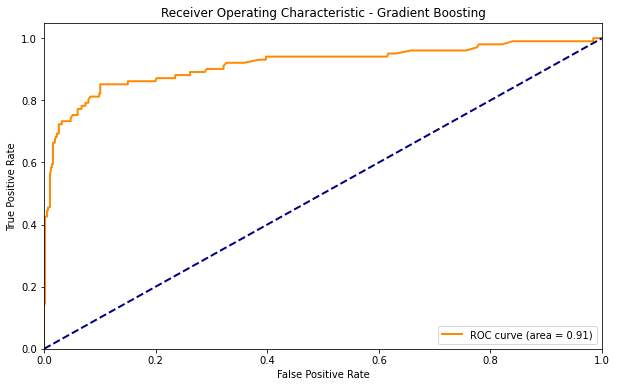

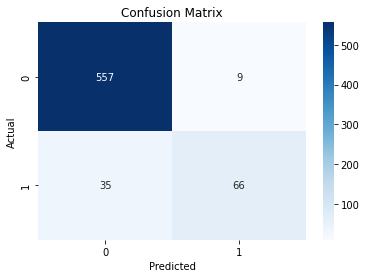

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.88      0.65      0.75       101

    accuracy                           0.93       667
   macro avg       0.91      0.82      0.86       667
weighted avg       0.93      0.93      0.93       667

--------------------------------
Model: Gradient Boosting
Accuracy: 0.9340329835082459
Precision: 0.88
Recall: 0.6534653465346535
F1 score: 0.7500000000000001
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}


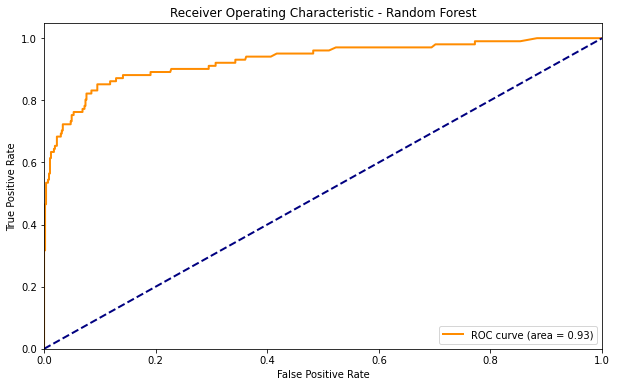

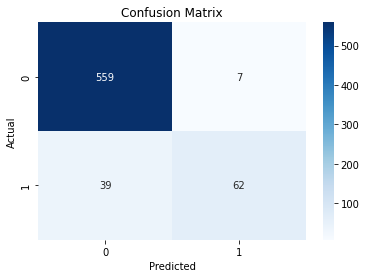

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       566
           1       0.90      0.61      0.73       101

    accuracy                           0.93       667
   macro avg       0.92      0.80      0.84       667
weighted avg       0.93      0.93      0.93       667

--------------------------------
Model: Random Forest
Accuracy: 0.9310344827586207
Precision: 0.8985507246376812
Recall: 0.6138613861386139
F1 score: 0.7294117647058823
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 625 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1625 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 2275 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 3025 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 3875 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 4825 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   29.2s finished


Best parameters for Extreme Gradient Boosting: {'n_estimators': 170, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_depth': 17, 'learning_rate': 0.30000000000000004}


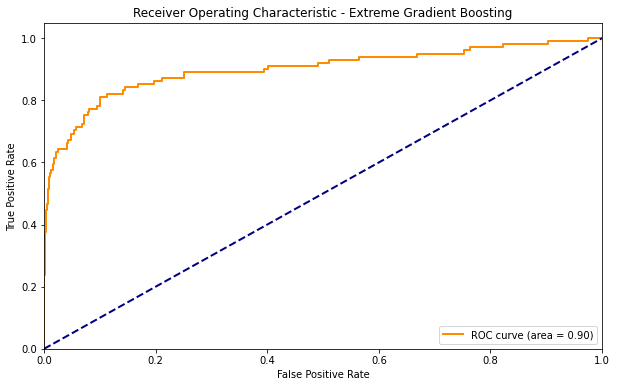

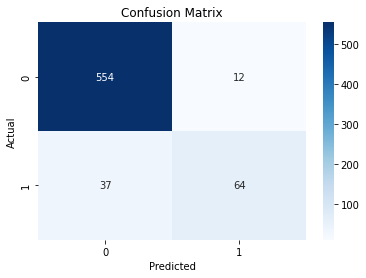

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.84      0.63      0.72       101

    accuracy                           0.93       667
   macro avg       0.89      0.81      0.84       667
weighted avg       0.92      0.93      0.92       667

--------------------------------
Model: Extreme Gradient Boosting
Accuracy: 0.9265367316341829
Precision: 0.8421052631578947
Recall: 0.6336633663366337
F1 score: 0.7231638418079095
Best parameters for Decision Tree: {'max_depth': 5, 'max_leaf_nodes': 13, 'min_samples_leaf': 6, 'min_samples_split': 2}


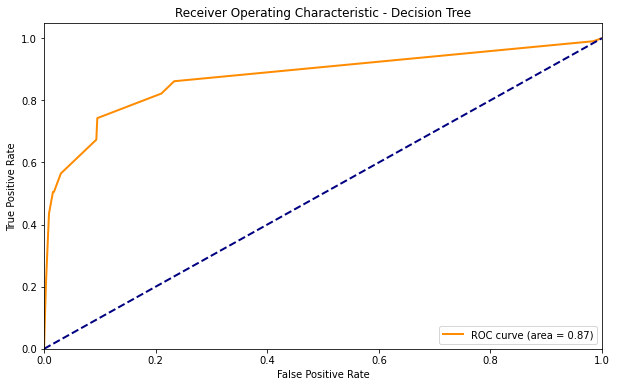

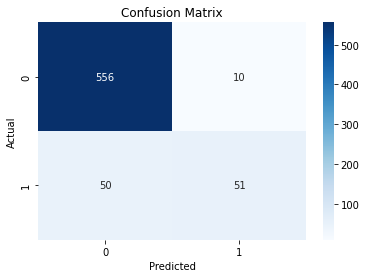

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       566
           1       0.84      0.50      0.63       101

    accuracy                           0.91       667
   macro avg       0.88      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667

--------------------------------
Model: Decision Tree
Accuracy: 0.9100449775112444
Precision: 0.8360655737704918
Recall: 0.504950495049505
F1 score: 0.6296296296296297


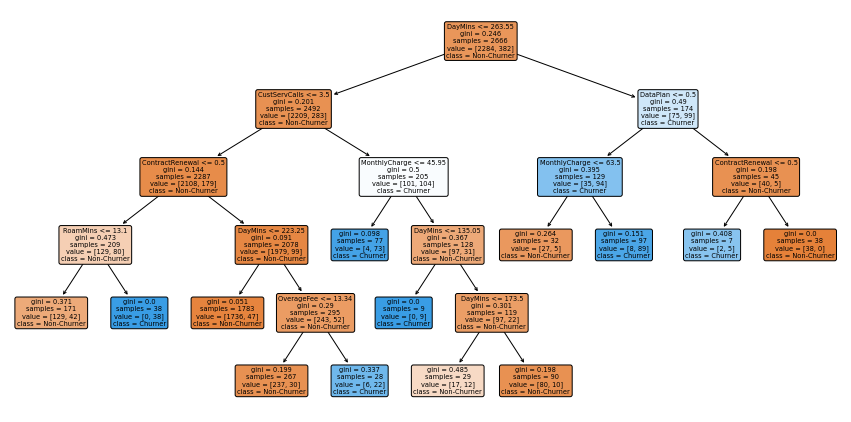

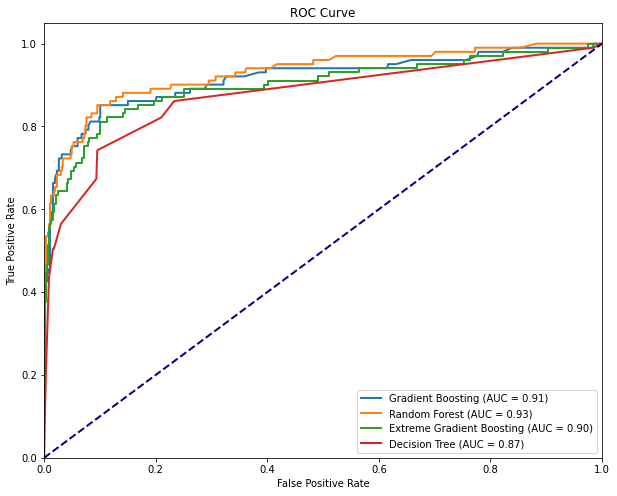

,Model,Accuracy,Precision_Score,Recall_Score,F1_Score,ROC_AUC
0,Gradient Boosting,0.93,0.88,0.65,0.75,0.91
1,Random Forest,0.93,0.90,0.61,0.73,0.93
2,Extreme Gradient Boosting,0.93,0.84,0.63,0.72,0.90
3,Decision Tree,0.91,0.84,0.51,0.63,0.87


In [122]:
# Define hyperparameter grids
param_grids = {
"Gradient Boosting": {
    'learning_rate': np.arange(0.1, 1.5, 0.1),
    'n_estimators': range(50, 200, 10),
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_leaf_nodes': range(1, 20),
    # 'criterion': ['friedman_mse', 'mse', 'mae'],
    # 'loss': ['deviance', 'exponential'],
    # 'subsample': np.arange(0.1, 1.1, 0.1),
},
"Random Forest": {
    'n_estimators': range(50, 200, 10),
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # 'max_depth': (range(1, 20)),
    # 'min_samples_split': range(2, 20),
    # 'min_samples_leaf': range(1, 20),
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_leaf_nodes': (range(1, 20)),
    # 'class_weight': ['balanced', 'balanced_subsample', None],
    # 'criterion': ['gini', 'entropy']
},
"Extreme Gradient Boosting": {
    'learning_rate': np.arange(0.1, 1.5, 0.1),
    'n_estimators': range(50, 200, 10),
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_leaf_nodes': range(1, 20),
    # 'criterion': ['friedman_mse', 'mse', 'mae'],
    # 'loss': ['deviance', 'exponential'],
    # 'subsample': np.arange(0.1, 1.1, 0.1),
},
"Decision Tree": {
    'max_depth': (range(1, 20)),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': (range(1, 20)),
    # 'class_weight': ['balanced', None],
    # 'criterion': ['gini', 'entropy']
}
}

# Define models
models = {
    "Gradient Boosting": GradientBoostingClassifier(), 
    "Random Forest": RandomForestClassifier(),   # random_state=17052024
    "Extreme Gradient Boosting": XGBClassifier(), 
    "Decision Tree": DecisionTreeClassifier() }

# Define scoring
scoring = {
    "Acc": make_scorer(accuracy_score),
    "F1": "f1",
    "Recall": "recall",
    "Precision": "precision",
    "ROC_AUC": "roc_auc"
}

# Initialize storage for metrics
ht_results = []

# Storage for ROC curve data
ht_roc_data = []


def perform_random_search(name, model, param_grid, X_train, y_train):
    random_search = RandomizedSearchCV(estimator=model,
    param_distributions=param_grid,
    cv=5, n_jobs=-1, n_iter=1000,
    scoring=scoring, verbose=1, refit="F1")
    random_search.fit(X_train, y_train)
    return random_search.best_params_, random_search.best_estimator_

def perform_grid_search(name, model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3) 
    grid_search.fit(X_train, y_train) 
    return grid_search.best_params_, grid_search.best_estimator_

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
  
    # Collect metrics
    accuracy =  metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    # Calculate ROC/AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    ht_results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision_Score": round(precision, 4),
        "Recall_Score": round(recall, 4),
        "F1_Score": round(f1, 4),
        "ROC_AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    })

    if y_pred_proba is not None:
        ht_roc_data.append((fpr, tpr, roc_auc, name))
    
    plt.figure(figsize=(10, 6)) 
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})') 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title(f'Receiver Operating Characteristic - {name}') 
    plt.legend(loc="lower right")
    plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print('--------------------------------')

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred)) 
    print("Precision:", metrics.precision_score(y_test, y_pred)) 
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 score:", metrics.f1_score(y_test, y_pred))
    #print("ROC AUC score:", roc_auc(y_test, y_pred))

# Train and evaluate models
for name, model in models.items():
    param_grid = param_grids[name]
    if name in ["Gradient Boosting", "Extreme Gradient Boosting"]:
        best_params, best_model = perform_random_search(name, model, param_grid, X_train, y_train)
    else:
        best_params, best_model = perform_grid_search(name, model, param_grid, X_train, y_train)
    print(f'Best parameters for {name}: {best_params}') 
    best_model.fit(X_train, y_train) 
    evaluate_model(name, best_model, X_test, y_test)

    if name == "Decision Tree":
        plt.figure(figsize=(15,7.5))
        plot_tree(best_model, filled=True, rounded=True, feature_names=X_train.columns, class_names=['Non-Churner', 'Churner'])
        plt.show()

# Plot all ROC curves on the same graph
plt.figure(figsize=(10, 8))
for fpr, tpr, roc_auc, name in ht_roc_data:
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Create DataFrame
ht_comparison_table = pd.DataFrame(ht_results)
ht_comparison_table

-------------------------------

**Gradient Boosting - Hyperparameters**

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 625 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 1625 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 2275 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   57.7s finished


Best parameters for GBM: /n {'subsample': 0.6, 'n_estimators': 140, 'min_samples_split': 4, 'min_samples_leaf': 15, 'max_leaf_nodes': 19, 'max_features': 'auto', 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'mse'}


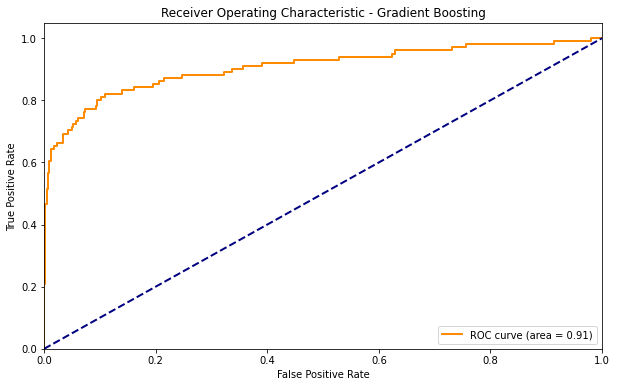

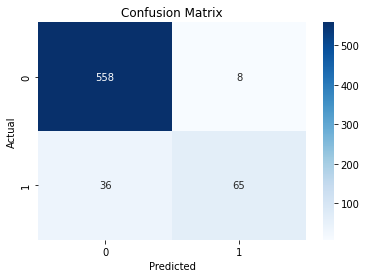

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.89      0.64      0.75       101

    accuracy                           0.93       667
   macro avg       0.91      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667

--------------------------------
Model: Gradient Boosting
Accuracy: 0.9340329835082459
Precision: 0.8904109589041096
Recall: 0.6435643564356436
F1 score: 0.7471264367816092


In [63]:
# Gradient Boosting hyperparameter tuning

name = "Gradient Boosting"

# Define the parameter grid
param_grid = {
    'n_estimators': range(50, 150, 10),
    'max_depth': (range(1, 20)),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': (range(1, 20)),
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'loss': ['deviance', 'exponential'],
    'subsample': np.arange(0.1, 1.1, 0.1),
    'learning_rate': np.arange(0.1, 1.1, 0.1)
}

# Create a GBM Classifier with the parameter grid
gbm_clf = GradientBoostingClassifier()   # random_state=17052024

# we will use multiple scoring metrics
scoring = {"Acc": make_scorer(accuracy_score), "F1": "f1", "Recall": "recall", "Precision": "precision", "AUC": "roc_auc"}

# Instantiate the grid search model
# grid_search = GridSearchCV(estimator=gbm_clf, param_grid=param_grid, cv=3)

# Define random search
random_search = RandomizedSearchCV(estimator=gbm_clf, 
                                   param_distributions=param_grid, cv=5, n_jobs=-1,
                                    n_iter=500, scoring=scoring, verbose=1, refit="F1")

# Fit the grid search to the data
# grid_search.fit(X_train, y_train)    # this takes 45 minutes
random_search.fit(X_train, y_train)

# Get the best parameters
best_params_gbm = random_search.best_params_

print(f'Best parameters for GBM: /n {best_params_gbm}')

# Train the model with best parameters
#best_grid = grid_search.best_estimator_
best_grid = random_search.best_estimator_
best_grid.fit(X_train, y_train)

# Model Evaluation
y_pred = best_grid.predict(X_test)
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print('--------------------------------')
print(f"Model: {name}")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

**Random Forest - Hyperparameters**

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


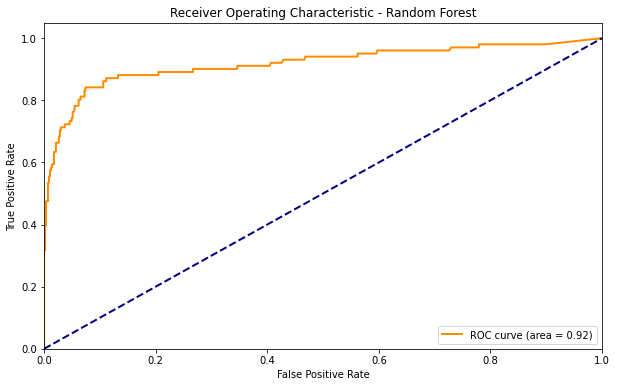

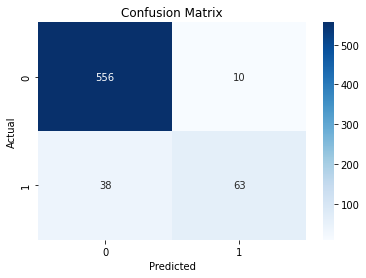

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.86      0.62      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667

--------------------------------
Model: Random Forest
Accuracy: 0.9280359820089955
Precision: 0.863013698630137
Recall: 0.6237623762376238
F1 score: 0.7241379310344828


In [66]:
# Random forest hyperparameter tuning

name = "Random Forest"

# Define the parameter grid
param_grid = {
    # 'n_estimators': range(50, 150, 10),
    # 'max_depth': (range(1, 20)),
    # 'min_samples_split': range(2, 20),
    # 'min_samples_leaf': range(1, 20),
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_leaf_nodes': (range(1, 20)),
    # 'class_weight': ['balanced', 'balanced_subsample', None],
    # 'criterion': ['gini', 'entropy']
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier with the parameter grid
rf_clf = RandomForestClassifier(random_state=17052024)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search.best_params_

print(f'Best parameters for Random Forest: {best_params_rf}')

# Train the model with best parameters
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

# Model Evaluation
y_pred = best_grid.predict(X_test)
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print('--------------------------------')
print(f"Model: {name}")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

**Extreme Gradient Boosting - Hyperparameters**

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1624 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 2274 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   14.7s finished


Best parameters for xGBM: {'subsample': 0.9, 'n_estimators': 90, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_leaf_nodes': 18, 'max_features': 'log2', 'max_depth': 16, 'loss': 'deviance', 'learning_rate': 0.6, 'criterion': 'mse'}


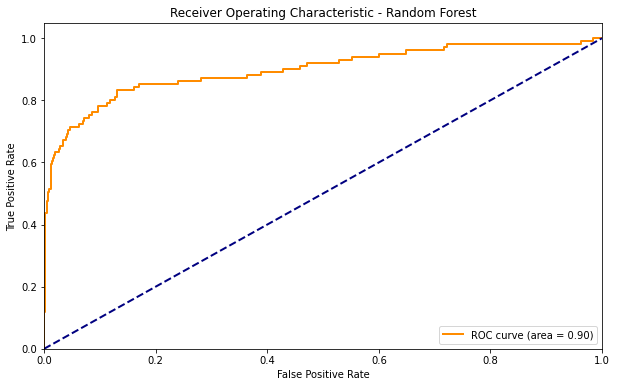

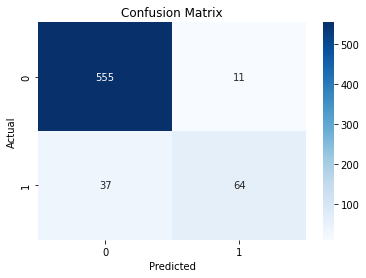

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.85      0.63      0.73       101

    accuracy                           0.93       667
   macro avg       0.90      0.81      0.84       667
weighted avg       0.92      0.93      0.92       667

--------------------------------
Model: Extreme Gradient Boosting
Accuracy: 0.9280359820089955
Precision: 0.8533333333333334
Recall: 0.6336633663366337
F1 score: 0.7272727272727273


In [69]:
# Extreme Gradient Boosting hyperparameter tuning

name = "Extreme Gradient Boosting"

# Define the parameter grid
param_grid = {
    'n_estimators': range(50, 150, 10),
    'max_depth': (range(1, 20)),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': (range(1, 20)),
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'loss': ['deviance', 'exponential'],
    'subsample': np.arange(0.1, 1.1, 0.1),
    'learning_rate': np.arange(0.1, 1.1, 0.1)
}

# Create a GBM Classifier with the parameter grid
xgbm_clf = XGBClassifier()

# Instantiate the grid search model
#grid_search = GridSearchCV(estimator=xgbm_clf, param_grid=param_grid, cv=3)
random_search = RandomizedSearchCV(estimator=xgbm_clf, 
                                   param_distributions=param_grid, cv=5, n_jobs=-1,
                                    n_iter=500, scoring=scoring, verbose=1, refit="F1")

# Fit the grid search to the data
# grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params_xgbm = random_search.best_params_

print(f'Best parameters for xGBM: {best_params_xgbm}')

# Train the model with best parameters
best_grid = random_search.best_estimator_
best_grid.fit(X_train, y_train)

# Model Evaluation
y_pred = best_grid.predict(X_test)
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print('--------------------------------')
print(f"Model: {name}")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

**Decision Tree - Hyperparameters**

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.3s finished


Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


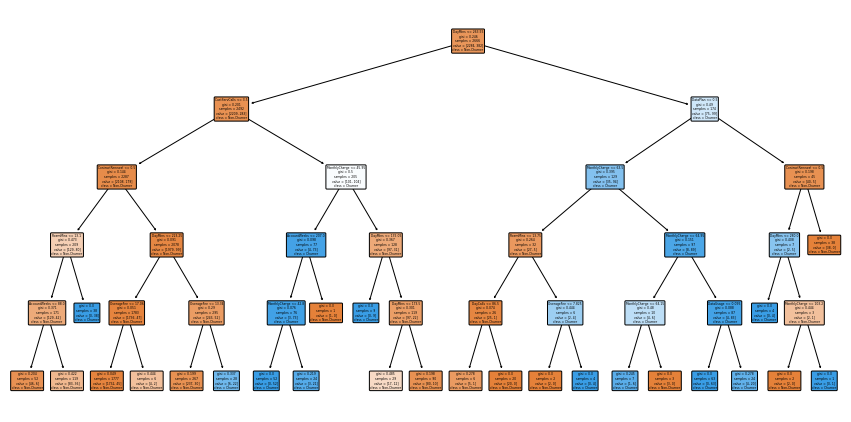

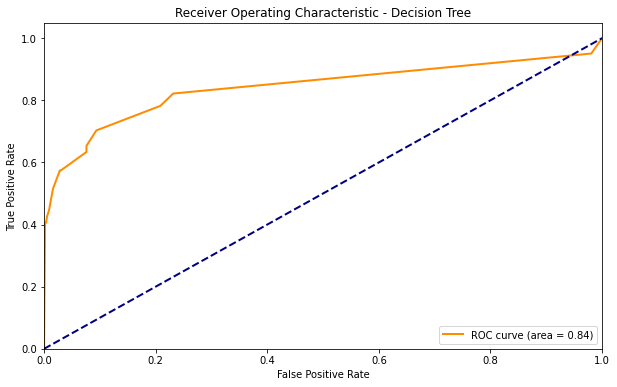

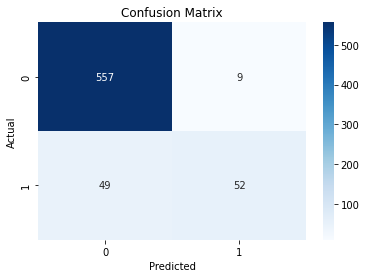

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       566
           1       0.85      0.51      0.64       101

    accuracy                           0.91       667
   macro avg       0.89      0.75      0.80       667
weighted avg       0.91      0.91      0.90       667

--------------------------------
Model: Decision Tree
Accuracy: 0.9130434782608695
Precision: 0.8524590163934426
Recall: 0.5148514851485149
F1 score: 0.6419753086419753


In [68]:
# Decision tree hyperparameter tuning

name = "Decision Tree"

param_grid = {
    # 'max_depth': (range(1, 20)),
    # 'min_samples_split': range(2, 20),
    # 'min_samples_leaf': range(1, 20),
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_leaf_nodes': (range(1, 20)),
    # 'class_weight': ['balanced', None],
    # 'criterion': ['gini', 'entropy']
    'max_depth': np.arange(5, 10, 15),
    'min_samples_split': np.arange(2, 8, 15),
    'min_samples_leaf': np.arange(1, 6, 15),
}

# Create a Decision Tree Classifier with the parameter grid
clf = DecisionTreeClassifier() #random_state=17052024

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search.best_params_
print(f'Best parameters for Random Forest: {best_params_dt}')

# Train the model with best parameters
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

# Visualise the decision tree
plt.figure(figsize=(20,12)
plot_tree(best_grid, filled=True, rounded=True,
          feature_names=df_feature.columns,
          class_names=['Non-Churner','Churner'])
plt.show()

# Model Evaluation
y_pred = best_grid.predict(X_test)
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print('--------------------------------')
print(f"Model: {name}")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

In [ ]:
# store results
dt_results = pd.DataFrame(random_search.cv_results_)

# extract relevant columns
param_cols = dt_results.columns[dt_results.columns.str.contains('param_') | dt_results.columns.str.contains('mean_') | dt_results.columns.str.contains('rank_')]
param_cols = param_cols[~param_cols.str.contains('time')]
dt_results_trimmed = dt_results[param_cols].copy()

# side by side boxplot for mean_test_F1 and mean_test_Accuracy
# melt the data
dt_results_melted = pd.melt(dt_results, id_vars=param_cols[param_cols.str.contains('param_')], 
                            value_vars=['mean_test_Acc', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Precision', 'mean_test_AUC'],
                            var_name='Metric', value_name='Score')

# plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Score', y='Metric', data=dt_results_melted, hue='Metric')
plt.title('Comparison of Evaluation Metrics')
plt.xlim(-.05, 1.05)
plt.show()

# scatter matrix
sns.pairplot(dt_results[['mean_test_Acc', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Precision', 'mean_test_AUC']],
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

-----------------

# Monitoring Plan 

### 1. **Data Drift Detection Monitoring**

#### 1.1. Setup

- **Frequency**: Weekly
- **Tools**: Python, Seaborn, Matplotlib, Pandas, Scipy

#### 1.2. Implementation

- **Step 1**: Load and preprocess data.
- **Step 2**: Perform KS tests to detect data drift.
- **Step 3**: Visualize data distributions and p-values.
- **Step 4**: Log and alert based on drift detection.le.


#### 1.3. Code

**1. Load and preprocess data**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from datetime import datetime

# Load current and new datasets
current_data = pd.read_csv('Customer-Churn-Records.csv')
new_data = pd.read_csv('Customer-Churn-Records-New.csv')

# Preprocess data by removing redundant columns
current_data = current_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
new_data = new_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


**2. Detect data drift**

In [ ]:
# Columns to check for drift (excluding the target column 'Exited')
columns_to_check = current_data.columns.drop('Exited')

# Perform KS test for data drift detection
ks_test_results = {}
for column in columns_to_check:
    statistic, p_value = ks_2samp(current_data[column], new_data[column])
    ks_test_results[column] = p_value

# Convert results to DataFrame
ks_test_df = pd.DataFrame(list(ks_test_results.items()), columns=['Feature', 'p-value'])
drift_threshold = 0.05
ks_test_df['Drift'] = ks_test_df['p-value'] < drift_threshold

# Display features with significant drift
drifted_features = ks_test_df[ks_test_df['Drift']]
print("Features showing significant data drift:")
print(drifted_features)

**3. Visualize data distributions and KS test results**

In [ ]:
# Visualize KS test results
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='p-value', data=ks_test_df, palette='viridis')
plt.axhline(y=drift_threshold, color='red', linestyle='--', label='Drift Threshold')
plt.xticks(rotation=90)
plt.title('KS Test p-values for Data Drift Detection')
plt.legend()
plt.show()

# Visualize data distributions
for column in columns_to_check:
    plt.figure(figsize=(10, 5))
    sns.distplot(current_data[column], color='blue', label='Current Data', kde=True, bins=30)
    sns.distplot(new_data[column], color='orange', label='New Data', kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

### 2. **Model Performance Monitoring**

#### 2.1. Setup

- **Frequency**: Weekly
- **Tools**: Python, Scikit-learn, Pandas

#### 2.2. Implementation

- **Step 1**: Split data into training and test sets.
- **Step 2**: Train and evaluate the model.
- **Step 3**: Monitor key metrics (accuracy, precision, recall, ROC AUC).
- **Step 4**: Log and alert based on performance metrics.

#### 2.3. Code


**4. Split data into training and test sets**

In [ ]:
# Split data into training and test sets
X = current_data.drop('Exited', axis=1)
y = current_data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5. Train and evaluate the model**

In [ ]:
# Train and evaluate the model using Logistic Regression with hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = best_log_reg.predict(X_test)
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_report_dict['roc_auc'] = roc_auc

print("Model Performance Metrics:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc}")